In [1]:
%matplotlib inline


import numpy as np

import xarray as xr

#import regionmask 

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import numpy.ma as ma
import csv
#import netCDF4 as nc
import scipy
import pandas
from glob import glob
import pandas as pd

np.seterr(invalid='ignore'); # disable a warning from matplotlib and cartopy

In [2]:
# WILL USE THESE UNITS FOR CONVERSIONS LATER, INITIALIZE HERE
R=8.317 #J/(mol K)
MW=200.59 #molecular weight of hg in g/mol
ppt=1e-12 #current [Hg0] units is ex. .03 ppt, where ppt is 1e-12
stdpressure=101325 #pascals
stdtemp=273.15 #Kelvins

In [3]:
def fix_ds(ds):
    return ds.assign_coords({'LON':ds.LON, 'LAT':ds.LAT, 'ETAC':ds.ETAC, 'ETAE':ds.ETAE, 
                            'time':pd.to_datetime(ds.attrs['Start_Date'], format='%Y%m%d')}
                           ).expand_dims('time')

#open base files (with artisnal mining)
ds_base=xr.open_mfdataset('/net/fs03/d1/angot/postdoc/GMA_2018/my_runs/production_runs_2x2.5/BASE/netcdf_output/trac.201*.nc',
                         preprocess=fix_ds, concat_dim=['time'],combine='nested',drop_variables='DXYP__DXYP')
#open asgm files (without artisnal mining)
ds_asgm=xr.open_mfdataset('//net/fs03/d1/angot/postdoc/GMA_2018/my_runs/production_runs_2x2.5/ASGM/netcdf_output/trac.201*.nc',
                         preprocess=fix_ds, concat_dim=['time'], combine='nested',drop_variables='DXYP__DXYP')
ds_asgm

<xarray.Dataset>
Dimensions:             (Lon-000: 144, Lat-000: 91, Alt-002: 47, Alt-003: 48, time: 24, Alt-000: 1, Alt-001: 38)
Coordinates:
    LON                 (Lon-000) float32 dask.array<chunksize=(144,), meta=np.ndarray>
    LAT                 (Lat-000) float32 dask.array<chunksize=(91,), meta=np.ndarray>
    ETAC                (Alt-002) float32 dask.array<chunksize=(47,), meta=np.ndarray>
    ETAE                (Alt-003) float32 dask.array<chunksize=(48,), meta=np.ndarray>
  * time                (time) datetime64[ns] 2014-01-01 ... 2015-12-01
Dimensions without coordinates: Lon-000, Lat-000, Alt-002, Alt-003, Alt-000, Alt-001
Data variables: (12/80)
    Ap                  (time, Alt-003) float32 dask.array<chunksize=(1, 48), meta=np.ndarray>
    Bp                  (time, Alt-003) float32 dask.array<chunksize=(1, 48), meta=np.ndarray>
    IJ-AVG-S__Hg0       (time, Alt-002, Lat-000, Lon-000) float32 dask.array<chunksize=(1, 47, 91, 144), meta=np.ndarray>
    IJ-AVG-S__Hg2       (time, Alt-002, Lat-000, Lon-000) float32 dask.array<chunksize=(1, 47, 91, 144), meta=np.ndarray>
    IJ-AVG-S__HgP       (time, Alt-002, Lat-000, Lon-000) float32 dask.array<chunksize=(1, 47, 91, 144), meta=np.ndarray>
    EW-FLX-S__Hg0       (time, Alt-002, Lat-000, Lon-000) float32 dask.array<chunksize=(1, 47, 91, 144), meta=np.ndarray>
    ...                  ...
    DRYD-FLX__Hg2df     (time, Alt-000, Lat-000, Lon-000) float32 dask.array<chunksize=(1, 1, 91, 144), meta=np.ndarray>
    DRYD-FLX__HgPdf     (time, Alt-000, Lat-000, Lon-000) float32 dask.array<chunksize=(1, 1, 91, 144), meta=np.ndarray>
    DRYD-VEL__Hg0dv     (time, Alt-000, Lat-000, Lon-000) float32 dask.array<chunksize=(1, 1, 91, 144), meta=np.ndarray>
    DRYD-VEL__Hg2dv     (time, Alt-000, Lat-000, Lon-000) float32 dask.array<chunksize=(1, 1, 91, 144), meta=np.ndarray>
    TIME-TPS__TIMETROP  (time, Alt-001, Lat-000, Lon-000) float32 dask.array<chunksize=(1, 38, 91, 144), meta=np.ndarray>
    THETA-S__THETA      (time, Alt-002, Lat-000, Lon-000) float32 dask.array<chunksize=(1, 47, 91, 144), meta=np.ndarray>
Attributes:
    Title:       NetCDF file created by BPCH2NC (GAMAP v2-12+)
    Model:       GEOSFP_47L
    Delta_Lon:   2.5
    Delta_Lat:   2.0
    NLayers:     47
    Start_Date:  20140101
    Start_Time:  0
    End_Date:    20140201
    End_Time:    0

In [4]:
# for item in ds_base.keys():
    
#     dic=ds_base[item].attrs
#     res = [item] 
#     for key in dic.keys() : 
#         res.append(dic[key]) 
#     print(res)
#     Cat_m.append(res)


## Check the different types of variables 

In [5]:
Cat_m=[]
for item in ds_base.keys():
    if str(item)[:1]=='H':
        dic=ds_base[item].attrs
        res = [item] 
        for key in dic.keys() : 
            res.append(dic[key]) 
        print(res)
        Cat_m.append(res)


['HG-SRCE__Hg0_an', 'Anthro elemental Hg', 'kg']
['HG-SRCE__Hg0_aq', 'Ocean mass of elemental Hg', 'kg']
['HG-SRCE__Hg0_oc', 'Ocean-emitted elemental Hg', 'kg']
['HG-SRCE__Hg0_ln', 'Land re-emitted elemental Hg', 'kg']
['HG-SRCE__Hg0_na', 'Natural land source', 'kg']
['HG-SRCE__Hg2_an', 'Anthro divalent Hg', 'kg']
['HG-SRCE__Hg2_aq', 'Ocean mass of divalent Hg', 'kg']
['HG-SRCE__Hg2_sk', 'Mass of Hg2 sunk in ocean', 'kg']
['HG-SRCE__HgP_an', 'Anthro particulate Hg', 'kg']
['HG-SRCE__Hgaq_tot', 'Total oceanic mercury', 'kg']
['HG-SRCE__HgP_aq', 'Ocean mass of particulate Hg', 'kg']
['HG-SRCE__JorgC', 'Mass of orgC sunk in ocean', 'kg']
['HG-SRCE__Hg_bb', 'Hg biomass burn emis', 'kg']
['HG-SRCE__Hg_vg', 'Hg vegetation emissions', 'kg']
['HG-SRCE__Hg_so', 'Hg soil emissions', 'kg']
['HG-SRCE__Hg_up', 'Hg ocean up flux', 'kg']
['HG-SRCE__Hg_down', 'Hg ocean downflux', 'kg']
['HG-SRCE__Hg0_snow', 'Snow emission of Hg', 'kg']
['HG-SRCE__Hg_sn_oc', 'Snow Hg2 delivered to ocean', 'kg']
['HG-SR

In [6]:
emissions=['HG-SRCE__Hg0_an','HG-SRCE__Hg0_oc','HG-SRCE__Hg0_ln','HG-SRCE__Hg0_na','HG-SRCE__Hgaq_tot','HG-SRCE__Hg_bb','HG-SRCE__Hg_so','HG-SRCE__Hg_up','HG-SRCE__Hg_down','HG-SRCE__Hg0_snow'] 

In [7]:
Emit_Cat=[]
for item in ds_base.keys():
    if str(item)[:1]=='H':
        if item in emissions:
            Emit_Cat.append(item)
            print(item)
len(Emit_Cat)

HG-SRCE__Hg0_an
HG-SRCE__Hg0_oc
HG-SRCE__Hg0_ln
HG-SRCE__Hg0_na
HG-SRCE__Hgaq_tot
HG-SRCE__Hg_bb
HG-SRCE__Hg_so
HG-SRCE__Hg_up
HG-SRCE__Hg_down
HG-SRCE__Hg0_snow


10

In [8]:
ds_Em =xr.Dataset()
for item in Emit_Cat:
    ds_Em[item] =(ds_base[item])

ds_Em

<xarray.Dataset>
Dimensions:            (Lon-000: 144, Lat-000: 91, time: 24, Alt-000: 1)
Coordinates:
    LON                (Lon-000) float32 dask.array<chunksize=(144,), meta=np.ndarray>
    LAT                (Lat-000) float32 dask.array<chunksize=(91,), meta=np.ndarray>
  * time               (time) datetime64[ns] 2014-01-01 ... 2015-12-01
Dimensions without coordinates: Lon-000, Lat-000, Alt-000
Data variables:
    HG-SRCE__Hg0_an    (time, Alt-000, Lat-000, Lon-000) float32 dask.array<chunksize=(1, 1, 91, 144), meta=np.ndarray>
    HG-SRCE__Hg0_oc    (time, Alt-000, Lat-000, Lon-000) float32 dask.array<chunksize=(1, 1, 91, 144), meta=np.ndarray>
    HG-SRCE__Hg0_ln    (time, Alt-000, Lat-000, Lon-000) float32 dask.array<chunksize=(1, 1, 91, 144), meta=np.ndarray>
    HG-SRCE__Hg0_na    (time, Alt-000, Lat-000, Lon-000) float32 dask.array<chunksize=(1, 1, 91, 144), meta=np.ndarray>
    HG-SRCE__Hgaq_tot  (time, Alt-000, Lat-000, Lon-000) float32 dask.array<chunksize=(1, 1, 91, 144), meta=np.ndarray>
    HG-SRCE__Hg_bb     (time, Alt-000, Lat-000, Lon-000) float32 dask.array<chunksize=(1, 1, 91, 144), meta=np.ndarray>
    HG-SRCE__Hg_so     (time, Alt-000, Lat-000, Lon-000) float32 dask.array<chunksize=(1, 1, 91, 144), meta=np.ndarray>
    HG-SRCE__Hg_up     (time, Alt-000, Lat-000, Lon-000) float32 dask.array<chunksize=(1, 1, 91, 144), meta=np.ndarray>
    HG-SRCE__Hg_down   (time, Alt-000, Lat-000, Lon-000) float32 dask.array<chunksize=(1, 1, 91, 144), meta=np.ndarray>
    HG-SRCE__Hg0_snow  (time, Alt-000, Lat-000, Lon-000) float32 dask.array<chunksize=(1, 1, 91, 144), meta=np.ndarray>

In [9]:
Cat_m=[]
for item in ds_Em.keys():
    if str(item)[:1]=='H':
        dic=ds_Em[item].attrs
        res = [item] 
        for key in dic.keys() : 
            res.append(dic[key]) 
        print(res)
        Cat_m.append(res)


['HG-SRCE__Hg0_an', 'Anthro elemental Hg', 'kg']
['HG-SRCE__Hg0_oc', 'Ocean-emitted elemental Hg', 'kg']
['HG-SRCE__Hg0_ln', 'Land re-emitted elemental Hg', 'kg']
['HG-SRCE__Hg0_na', 'Natural land source', 'kg']
['HG-SRCE__Hgaq_tot', 'Total oceanic mercury', 'kg']
['HG-SRCE__Hg_bb', 'Hg biomass burn emis', 'kg']
['HG-SRCE__Hg_so', 'Hg soil emissions', 'kg']
['HG-SRCE__Hg_up', 'Hg ocean up flux', 'kg']
['HG-SRCE__Hg_down', 'Hg ocean downflux', 'kg']
['HG-SRCE__Hg0_snow', 'Snow emission of Hg', 'kg']


In [10]:
Cat_m={}
for item in ds_Em.keys():
    if str(item)[:1]=='H':
        dic=ds_Em[item].attrs
        res = [] 
        for key in dic.keys() : 
            res.append(dic[key]) 
        print(res)
        Cat_m[item]=res


['Anthro elemental Hg', 'kg']
['Ocean-emitted elemental Hg', 'kg']
['Land re-emitted elemental Hg', 'kg']
['Natural land source', 'kg']
['Total oceanic mercury', 'kg']
['Hg biomass burn emis', 'kg']
['Hg soil emissions', 'kg']
['Hg ocean up flux', 'kg']
['Hg ocean downflux', 'kg']
['Snow emission of Hg', 'kg']


In [11]:
#dr=ds_Em.rename({'Lon-000': 'longitude','Lat-000': 'latitude'})
#drSA=dr.loc[dict(longitude=slice(-92.0,-25.0),latitude=slice(-58.0,18.0))]
#dr
#ds_Em[emissions[3]] =' Natural land source'
#ds_Em[emissions[2]] = 'Land re-emitted elemental Hg'


In [12]:
for item in emissions:
    print(item+' = '+Cat_m[item][0])

HG-SRCE__Hg0_an = Anthro elemental Hg
HG-SRCE__Hg0_oc = Ocean-emitted elemental Hg
HG-SRCE__Hg0_ln = Land re-emitted elemental Hg
HG-SRCE__Hg0_na = Natural land source
HG-SRCE__Hgaq_tot = Total oceanic mercury
HG-SRCE__Hg_bb = Hg biomass burn emis
HG-SRCE__Hg_so = Hg soil emissions
HG-SRCE__Hg_up = Hg ocean up flux
HG-SRCE__Hg_down = Hg ocean downflux
HG-SRCE__Hg0_snow = Snow emission of Hg


## Extract variables of interest

In [33]:
Hg_year_0714to0715=ds_Em.sel(time=slice("2014-07-01T00:00:00.000000000", "2015-07-01T00:00:00.000000000"))

In [67]:
Antro_Hg=Hg_year_0714to0715['HG-SRCE__Hg0_an'].sum('time')

## Depreciated Code

In [95]:
# # lists the variables in ds 
# # output: ['ens1', 'ens2', 'ens3']
# variables = list(Hg_year_0714to0715)

# # list of DataArrays for each variable
# # each with a new coordinate
# da_list = [Hg_year_0714to0715[var].expand_dims('ensemble', axis=0).
#                    assign_coords(ensemble=[var]).
#                    rename('concentration') for var in variables]

# # merges all list of DataArrays together
# ds_merged = xr.merge(da_list)

# # keep global attributes
# global_attrs = Hg_year_0714to0715.attrs
# ds_merged.attrs = Hg_year_0714to0715.attrs

In [96]:
# ds_merged.sum('time').plot()

In [97]:
# mean=ds_merged.resample(time='12MS').mean()['concentration']

In [98]:
# df_emit = ds_Em.to_dataframe()
# df_emit

In [99]:
# df_emit = ds_Em.to_dataframe()
# df_Esurf=df_emit[:157248]

# # #######changing units to ng/m3 from ppt using P/(TR)*pptv*MW #########
# del df_Esurf['LON']
# del df_Esurf['LAT']
# '''P/(TR)*ppt*MW --> Pa/(K*J/(mol*K))*ppt*g/mol --> g/m3*ppt. to get rid of ppt, multiply by 1e-12.'''
# #species=['HG-SRCE__Hgdep_sn', 'HG-SRCE__Hgdep_oc', 'HG-SRCE__Hg_sn_oc',
# #        'HG-SRCE__Hg0_snow','HG-SRCE__Hg_down','HG-SRCE__Hg_up','HG-SRCE__Hg0_an',
#  #       'HG-SRCE__Hg0_aq','HG-SRCE__Hg0_oc','HG-SRCE__Hg0_ln','HG-SRCE__Hg0_na','HG-SRCE__Hg_vg',
# #        'HG-SRCE__Hg_bb']
# for s in Emit_Cat:
#     df_Esurf[s]= df_Esurf[s]#1e12 converts from kg to ng

# #now units are ng/m3
# #ds_b['IJ-AVG-S_Hg0'].attrs['unit']='ng/m3'
# df_Esurf

In [100]:
# df_Esurf['Tot_emit'] = df_Esurf.sum(axis=1)
# df_Esurf['Tot_emit']

In [101]:
# dx_Emit=df_Esurf.to_xarray()
# dx_Emit

In [102]:
#dr_tot=df_Esurf['Tot_emit'].to_xarray()
#dr_tot

In [103]:
# #coordinates got messed up so fix it

# drop=dx_Emit.drop('Lon-000')
# new=dx_Emit.drop('Lat-000')
# dr_fixed=new.assign_coords({'Lon-000':np.arange(-180., 180., 2.5), 'Lat-000':np.arange(-90., 90., 1.98)})
# dr_fixed

In [104]:
# dr=dr_fixed.rename({'Lon-000': 'longitude','Lat-000': 'latitude'})
# drSA=dr.loc[dict(longitude=slice(-92.0,-25.0),latitude=slice(-58.0,18.0))]
# dr

In [105]:
# Cat_m

In [106]:
# #antro=drSA[emissions[1]]#'Tot_emit'
# Total=drSA['Tot_emit']#'Tot_emit'
# World_Total=dr['Tot_emit']

## Create Plot 

In [75]:
%cd fs03/d1/tzd/Data_analysis/MIT_TPP_thesis/JPnotebooks
from gamap_colormap import WhGrYlRd  # import the "WhGrYlRd" variable from my custom Python script
type(WhGrYlRd)  # our custom colormap

matplotlib.colors.ListedColormap

### Plot Global map of Antropogenic hg emissions

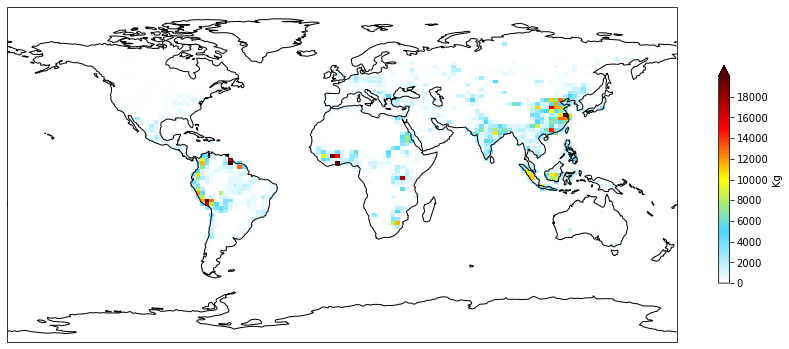

In [84]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
fig = plt.figure(figsize=[15,8])
ax = fig.add_subplot(111, projection=ccrs.PlateCarree())

im=Antro_Hg.plot(ax=ax,x='LON',y='LAT', #set the axis
                        levels = np.arange(0, 20000, 5), #set the levels for our colorbars
                       #extend='both',#extend the colorbar in both directions
                       transform=ccrs.PlateCarree(), #fit data into map
                       cbar_kwargs={'label':'Kg','orientation':'vertical','shrink':0.5}, #label our colorbar (use ds_a just to get units)
                        cmap=WhGrYlRd  )  #choose color for our colorbar

ax.coastlines() #add coastlines
# divider = make_axes_locatable(ax)
# cax = divider.append_axes("right", size="5%", pad=0.05)
   
# plt.colorbar(im, cax=cax)
#plt.colorbar(im,fraction=0.046, pad=0.04)
# ax.set_xlim([-85, -60])
# ax.set_ylim([-20, 0])
#plt.title('Annual Averaged Total Emissions', fontsize = 16); #title
plt.title('', fontsize = 16); #title
#av=df_d.resample('AS').mean()
#print('Global Average Value from Model: ',av['IJ-AVG-S_Hg0'][0])
name='Total_HG_emissions_in_World'
savepath='/home/tzd/fs03/d1/tzd/Data_analysis/MIT_TPP_thesis/figures/'+name+'.pdf'
fig.savefig(savepath,bbox_inches='tight')

### Plot south america map of Antropogenic hg emissions

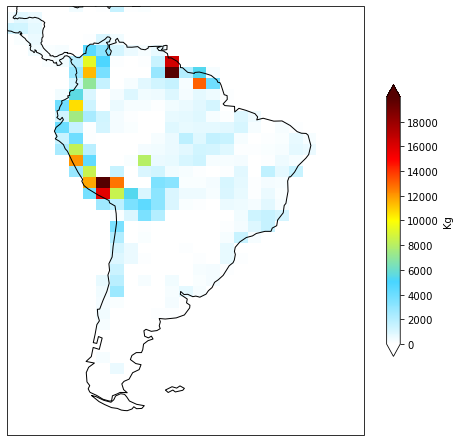

In [94]:
fig = plt.figure(figsize=[8,10])
ax = fig.add_subplot(111, projection=ccrs.PlateCarree())

im=Antro_Hg.plot(ax=ax,x='LON',y='LAT', #set the axis
                        levels = np.arange(0, 20000, 5), #set the levels for our colorbars
                       extend='both',#extend the colorbar in both directions
                       transform=ccrs.PlateCarree(), #fit data into map
                       cbar_kwargs={'label':'Kg','shrink':0.5}, #label our colorbar (use ds_a just to get units)
                        cmap=WhGrYlRd)  #choose color for our colorbar

ax.coastlines() #add coastlines
ax.set_xlim([-90, -25])
ax.set_ylim([-60, 18])
#plt.title('Annual Averaged Total Emissions', fontsize = 16); #title
plt.title('', fontsize = 16); #title
#av=df_d.resample('AS').mean()
#print('Global Average Value from Model: ',av['IJ-AVG-S_Hg0'][0])
name='Total_HG_emissions_in_Latam'
savepath='/home/tzd/fs03/d1/tzd/Data_analysis/MIT_TPP_thesis/figures/'+name+'.pdf'
fig.savefig(savepath,bbox_inches='tight')

In [107]:
# import matplotlib as mpl
# import matplotlib.pyplot as plt
# import numpy as np

# fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(10, 20),subplot_kw={'projection': ccrs.PlateCarree()})
# norm = mpl.colors.Normalize(vmin=0, vmax=5)
# cmap = mpl.cm.ScalarMappable(norm=norm, cmap=WhGrYlRd).cmap
# i=0
# for ax in axes.flat:
#     #ax.set_axis_off()
#     im = drSA[emissions[i]].groupby('time.year').mean('time').plot(ax=ax,x='longitude',y='latitude', #set the axis
#                         #levels = np.arange(-500, 1500, .01), #set the levels for our colorbars
#                        extend='both',#extend the colorbar in both directions
#                        transform=ccrs.PlateCarree(), #fit data into map
#                        vmin=0, cbar_kwargs={'shrink': 0.5, 'label': 'Kg'},
#                         #cbar_kwargs={'label':'Kg'}, #label our colorbar (use ds_a just to get units)
#                         cmap=cmap)  #choose color for our colorbar

#     ax.coastlines() #add coastlines
#     ax.set_title(Cat_m[emissions[i]][0])
#     i=i+1
#     #plt.title('Annual Averaged Total Emissions', fontsize = 16); #title
    

# # notice that here we use ax param of figure.colorbar method instead of

# # the cax param as the above example

# #cbar = fig.colorbar(im, ax=axes.ravel().tolist(), shrink=0.95)

# #cbar.set_ticks(np.arange(0, 1.1, 0.5))
# #cbar.set_ticklabels(['low', 'medium', 'high'])

# plt.show()

In [108]:
# emissionsP=['HG-SRCE__Hg0_an','HG-SRCE__Hg0_oc','HG-SRCE__Hg0_ln','HG-SRCE__Hg0_na','HG-SRCE__Hg_bb','HG-SRCE__Hg_so','HG-SRCE__Hg0_snow','Tot_emit']
# Cat_m['Tot_emit']=['Annual Averaged Total Emissions','Kg']

In [109]:
# import matplotlib as mpl
# import matplotlib.pyplot as plt
# import numpy as np

# fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(10, 20),subplot_kw={'projection': ccrs.PlateCarree()})
# norm = mpl.colors.Normalize(vmin=0, vmax=5)
# cmap = mpl.cm.ScalarMappable(norm=norm, cmap=WhGrYlRd).cmap
# i=0
# for ax in axes.flat:
#     #ax.set_axis_off()
#     im = drSA[emissionsP[i]].groupby('time.year').mean('time').plot(ax=ax,x='longitude',y='latitude', #set the axis
#                         #levels = np.arange(-500, 1500, .01), #set the levels for our colorbars
#                        extend='both',#extend the colorbar in both directions
#                        transform=ccrs.PlateCarree(), #fit data into map
#                        vmin=0, cbar_kwargs={'shrink': 0.5, 'label': 'Kg'},
#                         #cbar_kwargs={'label':'Kg'}, #label our colorbar (use ds_a just to get units)
#                         cmap=cmap)  #choose color for our colorbar

#     ax.coastlines() #add coastlines
#     ax.set_title(Cat_m[emissionsP[i]][0])
#     i=i+1
#     #plt.title('Annual Averaged Total Emissions', fontsize = 16); #title
    

# # notice that here we use ax param of figure.colorbar method instead of

# # the cax param as the above example

# #cbar = fig.colorbar(im, ax=axes.ravel().tolist(), shrink=0.95)

# #cbar.set_ticks(np.arange(0, 1.1, 0.5))
# #cbar.set_ticklabels(['low', 'medium', 'high'])

# plt.show()

In [110]:
# dr=df_Esurf['HG-SRCE__Hgdep_sn'].to_xarray()
# dr

In [ ]:
# #coordinates got messed up so fix it

# drop=dr_tot.drop('Lon-000')
# new=dr_tot.drop('Lat-000')
# dr_tot_fixed=new.assign_coords({'Lon-000':np.arange(-180., 180., 2.5), 'Lat-000':np.arange(-90., 90., 1.98)})
# dr_tot_fixed

In [ ]:
# dr_tot_fixed.mean(dim='time').plot()

In [ ]:
# fig = plt.figure(figsize=[16,8])
# ax = fig.add_subplot(111, projection=ccrs.PlateCarree())

# dr_tot_fixed.mean(dim='time').plot(ax=ax, #set the axis
#                         #levels = np.arange(0, 5, .01), #set the levels for our colorbars
#                        extend='both',#extend the colorbar in both directions
#                        transform=ccrs.PlateCarree(), #fit data into map
#                        #cbar_kwargs={'label':ds_a['IJ-AVG-S_Hg0'].attrs['unit']}, #label our colorbar (use ds_a just to get units)
#                         cmap='hsv')  #choose color for our colorbar

# ax.coastlines() #add coastlines
# plt.title('Monthly Averaged Hg0', fontsize = 16); #title
# #av=df_d.resample('AS').mean()
# #print('Global Average Value from Model: ',av['IJ-AVG-S_Hg0'][0])

In [ ]:

# dr_year=dr_fixed.groupby('time.year').mean('time').to_dataframe()

# dr_year


HG-SRCE__Hg0_an  HG-SRCE__Hg0_oc  \
Lon-000 Alt-000 year Lat-000                                     
-180.0  0       2015 -90.00               0.0              0.0   
                     -88.02               0.0              0.0   
                     -86.04               0.0              0.0   
                     -84.06               0.0              0.0   
                     -82.08               0.0              0.0   
...                                       ...              ...   
 177.5  0       2015  80.28               0.0              0.0   
                      82.26               0.0              0.0   
                      84.24               0.0              0.0   
                      86.22               0.0              0.0   
                      88.20               0.0              0.0   

                              HG-SRCE__Hg0_ln  HG-SRCE__Hg0_na  \
Lon-000 Alt-000 year Lat-000                                     
-180.0  0       2015 -90.00               0.0              0.0   
                     -88.02               0.0              0.0   
                     -86.04               0.0              0.0   
                     -84.06               0.0              0.0   
                     -82.08               0.0              0.0   
...                                       ...              ...   
 177.5  0       2015  80.28               0.0              0.0   
                      82.26               0.0              0.0   
                      84.24               0.0              0.0   
                      86.22               0.0              0.0   
                      88.20               0.0              0.0   

                              HG-SRCE__Hgaq_tot  HG-SRCE__Hg_bb  \
Lon-000 Alt-000 year Lat-000                                      
-180.0  0       2015 -90.00                 0.0             0.0   
                     -88.02                 0.0             0.0   
                     -86.04                 0.0             0.0   
                     -84.06                 0.0             0.0   
                     -82.08                 0.0             0.0   
...                                         ...             ...   
 177.5  0       2015  80.28                 0.0             0.0   
                      82.26                 0.0             0.0   
                      84.24                 0.0             0.0   
                      86.22                 0.0             0.0   
                      88.20                 0.0             0.0   

                              HG-SRCE__Hg_so  HG-SRCE__Hg_up  \
Lon-000 Alt-000 year Lat-000                                   
-180.0  0       2015 -90.00              0.0             0.0   
                     -88.02              0.0             0.0   
                     -86.04              0.0             0.0   
                     -84.06              0.0             0.0   
                     -82.08              0.0             0.0   
...                                      ...             ...   
 177.5  0       2015  80.28              0.0             0.0   
                      82.26              0.0             0.0   
                      84.24              0.0             0.0   
                      86.22              0.0             0.0   
                      88.20              0.0             0.0   

                              HG-SRCE__Hg_down  HG-SRCE__Hg0_snow  Tot_emit  
Lon-000 Alt-000 year Lat-000                                                 
-180.0  0       2015 -90.00                0.0           0.024343  0.024343  
                     -88.02                0.0           0.225347  0.225347  
                     -86.04                0.0           0.477493  0.477493  
                     -84.06                0.0           0.468542  0.468542  
                     -82.08                0.0           0.716523  0.716523  
...                                        ...               

In [111]:
# dr_yearX=dr_fixed.groupby('time.year').mean('time')
# dr_yearX

In [112]:
# dr_yearX=dr_yearX.rename({'Lon-000': 'longitude','Lat-000': 'latitude'})
# dr_yearX

In [113]:
# LAPA=dr_yearX.loc[dict(longitude=slice(-92.0,-25.0),latitude=slice(-58,18))]
# #da.loc[dict(time=slice("2000-01-01", "2000-01-02"))]

In [114]:
# dr_yearX=dr_yearX.rename({'Lon-000': 'longitude','Lat-000': 'latitude'})
# dr_yearX
# LAPA=dr_yearX.loc[dict(longitude=slice(-92.0,-25.0),latitude=slice(-58,18))]
# #da.loc[dict(time=slice("2000-01-01", "2000-01-02"))]

In [115]:

# fig = plt.figure(figsize=[15,15])
# ax = fig.add_subplot(111, projection=ccrs.PlateCarree())

# LAPA.plot(ax=ax, #set the axis
#                         levels = np.arange(0, 5, .01), #set the levels for our colorbars
#                        extend='both',#extend the colorbar in both directions
#                        transform=ccrs.PlateCarree(), #fit data into map
#                        cbar_kwargs={'label':ds_a['IJ-AVG-S_Hg0'].attrs['unit']}, #label our colorbar (use ds_a just to get units)
#                         cmap='hsv')  #choose color for our colorbar

# ax.coastlines() #add coastlines
# #-92ax.set_extent([-150, -20, -90, 90])
# plt.title('Annual Averaged Hg0', fontsize = 16); #title
# #av=df_d.resample('AS').mean()
# #print('Global Average Value from Model: ',av['IJ-AVG-S_Hg0'][0])

In [120]:
import geoplot.crs as gcrs
import geopandas as gpd
import geoplot as gplt
Lapan= pd.read_csv('LATAM_Passive_Sampler_Data_Analysis/LapanData.csv')
# Creating GeoPandas GeoDataFrame using the Pandas Dataframe 
Lapan_gdf = gpd.GeoDataFrame(Lapan, geometry = gpd.points_from_xy(Lapan['Longitude'],Lapan['Latitude'] ))



In [121]:
Lapan_gdf=Lapan_gdf.sort_values('Latitude')
Lapan_gdf

,Site,Latitude,Longitude,Date of deployment,Date of removal,Deployment length (days),Measured Conc (ng/m3),geometry
15,Glacie Dawin (Schapiarelli),-54.414400,-70.915700,2019-04-20,"March 14, 2020",329,0.79,POINT (-70.91570 -54.41440)
25,Villa Regina,-39.102333,-67.108361,2018-05-05,2019-05-01 00:00:00,361,0.79,POINT (-67.10836 -39.10233)
26,Bahia Blanca (after),-38.699528,-62.444778,2018-05-04,2019-04-30 00:00:00,361,0.95,POINT (-62.44478 -38.69953)
5,"Rio Grande, RS",-32.068906,-52.161475,2018-02-01,2019-01-31 00:00:00,364,1,POINT (-52.16148 -32.06891)
14,"Rio Grande, RS (Praça Tamandaré)",-32.033583,-52.099300,2018-12-29,2019-12-16 00:00:00,352,0.95,POINT (-52.09930 -32.03358)
1,"São José dos Ausentes, RS",-28.596650,-49.813100,2017-11-16,2018-11-20 00:00:00,369,0.63,POINT (-49.81310 -28.59665)
0,"Iguaçu National Park, PR",-25.626736,-54.478653,2017-10-20,2018-11-09 00:00:00,385,0.63,POINT (-54.47865 -25.62674)
27,Salta,-24.721342,-65.406064,2018-12-15,"January 6, 2020",387,0.99,POINT (-65.40606 -24.72134)
12,"Pico do Jaraguá, SP",-23.456314,-46.766117,2018-07-20,2019-07-31 00:00:00,376,1.22,POINT (-46.76612 -23.45631)
7,"Itatiaia National Park, RJ",-22.385833,-44.678889,2018-03-27,2019-07-02 00:00:00,462,0.8,POINT (-44.67889 -22.38583)


In [122]:
LAP=pd.DataFrame()
LAP['LONG']=Lapan_gdf['Longitude']
LAP['LATI']=Lapan_gdf['Latitude']
LAP['OBS']=Lapan_gdf['Measured Conc (ng/m3)']
LAP =LAP.reset_index(drop=True)


In [123]:
LAP =LAP.reset_index(drop=True)
LAP['OBS'].iloc[20]=0.88
#The observations are currently recorded as strings. They need to be changed to floating point numbers
observe=[]
for item in LAP['OBS']:
    observe.append(float(item))
observe    
LAP['OBS']=observe

/tmp/ipykernel_3840793/20476134.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  LAP['OBS'].iloc[20]=0.88


In [124]:
 df_Latin = gpd.GeoDataFrame(LAP , geometry = gpd.points_from_xy(LAP['LONG'],LAP['LATI'] ))

In [125]:
df_Latin
L_OB_GEO =df_Latin.drop(columns=['LATI','LONG']) 
L_OB_GEO

,OBS,geometry
0,0.79,POINT (-70.91570 -54.41440)
1,0.79,POINT (-67.10836 -39.10233)
2,0.95,POINT (-62.44478 -38.69953)
3,1.00,POINT (-52.16148 -32.06891)
4,0.95,POINT (-52.09930 -32.03358)
5,0.63,POINT (-49.81310 -28.59665)
6,0.63,POINT (-54.47865 -25.62674)
7,0.99,POINT (-65.40606 -24.72134)
8,1.22,POINT (-46.76612 -23.45631)
9,0.80,POINT (-44.67889 -22.38583)


/home/tzd/anaconda3/envs/Jlab/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:324: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/home/tzd/anaconda3/envs/Jlab/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:348: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '
/home/tzd/anaconda3/envs/Jlab/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:360: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


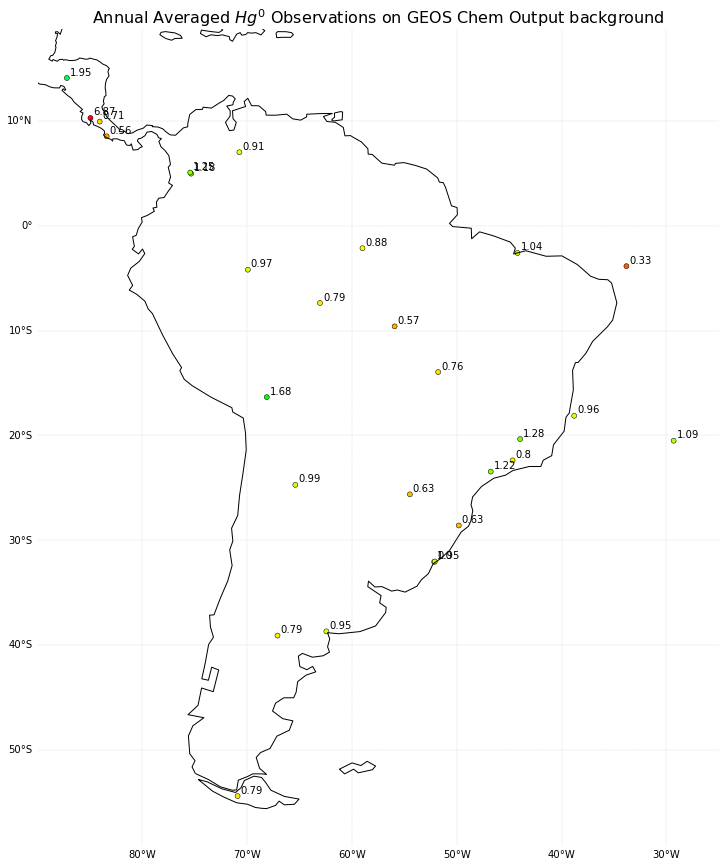

In [127]:
import matplotlib as mpl
fig = plt.figure(figsize=[15,15], frameon=True)
ax = plt.axes(projection=ccrs.PlateCarree(), frameon=True)
norm = mpl.colors.Normalize(vmin=0, vmax=5)
cmap = mpl.cm.ScalarMappable(norm=norm, cmap='hsv').cmap

# LAPA.plot(ax=ax, #set the axis
#                         #levels = np.arange(0, 5, .01), #set the levels for our colorbars
#                        extend='both',#extend the colorbar in both directions
#                        transform=ccrs.PlateCarree(), #fit data into map
#                        cbar_kwargs={'label':ds_a['IJ-AVG-S_Hg0'].attrs['unit']}, #label our colorbar (use ds_a just to get units)
#                         cmap=cmap,norm=norm)  #choose color for our colorbar
# #L_OB_GEO.plot(ax=ax,marker='o',levels = np.arange(0, 5, .01),cmap='hsv', markersize=20,)
gplt.pointplot(L_OB_GEO,hue='OBS', cmap=cmap,norm=norm,ax=ax,edgecolor='black', linewidth=0.5
)
for x, y, label in zip(L_OB_GEO.geometry.x, L_OB_GEO.geometry.y, L_OB_GEO.OBS):
        ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points")
        
ax.coastlines() #add coastlines

#ax.outline_patch.set_edgecolor('black')
#ax.gridlines(linestyle='--')
ax.set_extent([-90, -25, -55, 16])
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=0.3, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_left = True
gl.ylabels_right = False
gl.xlines = True
gl.ylines = True
plt.title('Annual Averaged $Hg^0$ Observations on GEOS Chem Output background', fontsize = 16); #title
#av=df_d.resample('AS').mean()
#print('Global Average Value from Model: ',av['IJ-AVG-S_Hg0'][0])

In [ ]:
LAPA

In [ ]:
#longitude=slice(-92.0,-25.0),latitude=slice(-58,18))]

fig = plt.figure(figsize=[15,15])
ax = fig.add_subplot(111, projection=ccrs.PlateCarree())

LAPA.plot(ax=ax, #set the axis
                        levels = np.arange(0, 5, .01), #set the levels for our colorbars
                       extend='both',#extend the colorbar in both directions
                       transform=ccrs.PlateCarree(), #fit data into map
                       cbar_kwargs={'label':ds_a['IJ-AVG-S_Hg0'].attrs['unit']}, #label our colorbar (use ds_a just to get units)
                        cmap='hsv')  #choose color for our colorbar
gplt.pointplot(L_OB_GEO,hue='OBS', cmap=cmap,norm=norm,ax=ax,edgecolor='black', linewidth=0.5
)
for x, y, label in zip(L_OB_GEO.geometry.x, L_OB_GEO.geometry.y, L_OB_GEO.OBS):
        ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points")


ax.set_extent([-90, -25, -55, 16])
ax.coastlines() #add coastlines
#-92ax.set_extent([-150, -20, -90, 90])
plt.title('Annual Averaged Hg0', fontsize = 16); #title
#av=df_d.resample('AS').mean()
#print('Global Average Value from Model: ',av['IJ-AVG-S_Hg0'][0])

In [ ]:
import matplotlib as mpl
fig = plt.figure(figsize=[15,15])
ax = fig.add_subplot(111, projection=ccrs.PlateCarree())
norm = mpl.colors.Normalize(vmin=0, vmax=7)
cmap = mpl.cm.ScalarMappable(norm=norm, cmap='hsv').cmap

#LAPA.plot(ax=ax, #set the axis
                        #levels = np.arange(0, 5, .01), #set the levels for our colorbars
                       #extend='both',#extend the colorbar in both directions
                       #transform=ccrs.PlateCarree(), #fit data into map
                       #cbar_kwargs={'label':ds_a['IJ-AVG-S_Hg0'].attrs['unit']}, #label our colorbar (use ds_a just to get units)
                       # cmap=cmap,norm=norm)  #choose color for our colorbar
#L_OB_GEO.plot(ax=ax,marker='o',levels = np.arange(0, 5, .01),cmap='hsv', markersize=20,)
gplt.pointplot(L_OB_GEO,hue='OBS', cmap=cmap,norm=norm,ax=ax,linewidth=0.5,
               label='$Hg^0_{obs}$',legend=False)
for x, y, label in zip(L_OB_GEO.geometry.x, L_OB_GEO.geometry.y, L_OB_GEO.OBS):
        ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points")
        
ax.coastlines() #add coastlines

ax.set_extent([-90, -25, -55, 16])
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=0.3, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_left = True
gl.ylabels_right = False
gl.xlines = True
gl.ylines = True
plt.title('Annual Averaged $Hg^0$ Observations', fontsize = 16); #title
#av=df_d.resample('AS').mean()
#print('Global Average Value from Model: ',av['IJ-AVG-S_Hg0'][0])

In [ ]:
da = xr.DataArray([1, 2, 3], [("x", [0, 1, 2])])

da.sel(x=[1.1, 1.9], method="nearest")

In [ ]:
LAP_GC=LAPA.sel(latitude=LAP['LATI'][1], longitude=LAP['LONG'][1],method="nearest")

In [ ]:
My_list=[LAP_GC]
My_list[0].to_dataframe().reset_index(drop=True)['IJ-AVG-S_Hg0'][0]

In [ ]:
GC_list=[]
for index,item in enumerate(LAP['OBS']):
    LAP_GC=LAPA.sel(latitude=LAP['LATI'][index], longitude=LAP['LONG'][index],method="nearest")
    val=LAP_GC.to_dataframe().reset_index(drop=True)['IJ-AVG-S_Hg0'][0]
    GC_list.append(val)
    print(item,':',val)

In [ ]:
df_comp=LAP
df_comp['GChem']=GC_list
df_comp

In [ ]:
from math import *
import numpy as np
from scipy import stats

x = df_comp['OBS'].drop(index=26)
y=df_comp['GChem'].drop(index=26)
slope, intercept, r_value, p_value, std_err= stats.linregress(x, y)
m = slope.astype(float)
#Create a basic scatter plot with Matplotlib
#A identity line was created based on the minumum and maximum observed value
#Points markers are colored by the residual and a residual colorbar is added to the figure
#df_compare['Residual'] = df_compare['GChem']- df_compare['Hg0_M_C(ng/m3)']
fig = plt.figure(figsize=(10,8))
z = np.linspace(0,3.0, 100)
plt.plot(z, z, linestyle='dashed',label="1:1 line")
plt.scatter(x,y, marker='o',color="purple",label="Data")
plt.plot(x, m*x + intercept, 'grey', label='regression fitted line')

#cbar = plt.colorbar()
#cbar.set_label('Residual (ng/m3)', fontsize=14)

plt.grid()
plt.legend()
plt.xlabel('Observed Concentration (ng/m3)', fontsize=14)
plt.ylabel(' Simulated Concentration (ng/m3)', fontsize=14)
fig.tight_layout()
#fig.savefig('../Figures/ObservedSimulatedHeadComparisonPlot.png')
print("slope:", slope,
      "\nintercept:", intercept,
      "\nr squared:", r_value**2,
      "\np-value:", p_value,
      "\nst_error", std_err,
      "\nRMSE", sqrt(std_err))

In [ ]:
#Create a basic scatter plot with Matplotlib
#A identity line was created based on the minumum and maximum observed value
#Points markers are colored by the residual and a residual colorbar is added to the figure
df_new=df_comp.drop(index=26)
x = df_comp['OBS'].drop(index=26)
y=df_comp['GChem'].drop(index=26)
df_new['Residual'] = x-y
fig = plt.figure(figsize=(10,8))
w= np.linspace(0,3, 100)
plt.plot(w, w, linestyle='dashed')
plt.scatter(x,y, marker='o', c=df_new['Residual'])

cbar = plt.colorbar()
cbar.set_label('Difference (ng/m3)', fontsize=14)

plt.grid()
plt.xlabel('Observed Concentration (ng/m3)', fontsize=14)
plt.ylabel('Simulated Concentration (ng/m3)', fontsize=14)
fig.tight_layout()
#fig.savefig('../Figures/ObservedSimulatedHeadComparisonPlot.png')

In [ ]:
#grap the latitude values from the data set to use for the x axes
Latitude =[]
for item in df_comp['LATI'].drop(index=26):
    Latitude.append(round(item, 2))


In [ ]:
def legend_without_duplicate_labels(ax):
    handles, labels = ax.get_legend_handles_labels()
    unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels)) if l not in labels[:i]]
    ax.legend(*zip(*unique))
    
labels = Latitude
Hg0obs = df_comp['OBS'].drop(index=26)
Hg0_GC = df_comp['GChem'].drop(index=26)

x = Latitude  # the label locations


fig, ax = plt.subplots(figsize=[18,10])
rects1 = ax.plot(x,Hg0obs,'o', label='$Hg^0_{obs}$')
rects2 = ax.plot(x,Hg0_GC,'*', label='$Hg^*_{GChem}$')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('$Hg^0 (ngm^{-3})$')
ax.set_title('Comparison between observed $Hg^0$ annual averages and GEOS Chem $Hg^0$ annual averages in South America ')
ax.set_xticks(x)
ax.set_xticklabels(labels,rotation=90, fontsize=10,ha='right')
#plt.xticks(x, labels, rotation='vertical')
#ax.legend()
ax.set_xlabel('Latitude')
legend_without_duplicate_labels(ax)

plt.show()

In [ ]:
df_Asurf['IJ-AVG-S_Hg0']

In [ ]:
LAP.set_index(['LATI', 'LONG'], inplace=True)
observe=[]
for item in LAP['OBS']:
    observe.append(float(item))
observe    
LAP['OBS']=observe
#.to_xarray()

<font size="5"> Begin making colorplots here using data loaded above

In [ ]:
copy=df_Asurf.copy()
df_dif=copy.drop(columns=['IJ-AVG-S_Hg0', 'IJ-AVG-S_HgP', 'IJ-AVG-S_Hg2', 'BXHGHT-S_BXHEIGHT', 'BXHGHT-S_T', 'BXHGHT-S_PMID'])
difference=[]
date=[]
subtract=df_Bsurf['IJ-AVG-S_Hg0']-df_Asurf['IJ-AVG-S_Hg0']
subtract=subtract.to_frame()
for row in subtract.itertuples():
    difference.append(row._1)
    date.append(row.Index[3])
df_dif['IJ-AVG-S_Hg0']=difference
df_dif

In [ ]:
dsHg=df_dif.to_xarray() #change to xarray dataset so you can graph it using prev method
#coordinates got messed up so fix it
dsHg

In [ ]:
dsHg=df_dif.to_xarray() #change to xarray dataset so you can graph it using prev method
#coordinates got messed up so fix it
drop=dsHg.drop('Lon-000')
new=dsHg.drop('Lat-000')
fixed_latlon=new.assign_coords({'Lon-000':np.arange(-180., 180., 2.5), 'Lat-000':np.arange(-90., 90., 1.98)})

fixed_latlon

In [ ]:
fig = plt.figure(figsize=[16,8])
ax = fig.add_subplot(111, projection=ccrs.PlateCarree())

fixed_latlon['IJ-AVG-S_Hg0'].mean(dim='time').plot(ax=ax, #set the axis
                        levels = np.arange(0, .5, .01), #set the levels for our colorbars
                       extend='both',#extend the colorbar in both directions
                       transform=ccrs.PlateCarree(), #fit data into map
                       cbar_kwargs={'label':ds_a['IJ-AVG-S_Hg0'].attrs['unit']}, #label our colorbar (use ds_a just to get units)
                        cmap='hsv')  #choose color for our colorbar

ax.coastlines() #add coastlines
plt.title('Monthly Averaged Hg0 Difference (Artisinal Mining - No Artisinal Mining)', fontsize = 16); #title
av=df_d.resample('AS').mean()
print('Global Average Value from Model: ',av['IJ-AVG-S_Hg0'][0])

In [ ]:
############## Plot time mean of Hg0 difference between Artisinal Mining and No AM ##########
fig = plt.figure(figsize=[16,8])
ax = fig.add_subplot(111, projection=ccrs.PlateCarree())

fixed_latlon['IJ-AVG-S_Hg0'].mean(dim='time').plot(ax=ax, #set the axis
                        levels = np.arange(0, .5, .01), #set the levels for our colorbars
                       extend='both',#extend the colorbar in both directions
                       transform=ccrs.PlateCarree(), #fit data into map
                       cbar_kwargs={'label':ds_a['IJ-AVG-S_Hg0'].attrs['unit']}, #label our colorbar (use ds_a just to get units)
                        cmap='hsv')  #choose color for our colorbar

ax.coastlines() #add coastlines
plt.title('Monthly Averaged Hg0 Difference (Artisinal Mining - No Artisinal Mining)', fontsize = 16); #title
av=df_d.resample('AS').mean()
print('Global Average Value from Model: ',av['IJ-AVG-S_Hg0'][0])

In [ ]:
######create empty frame with coordinates already ready######
#######add percent data by creating a temporary percent dataframe, which for some reason ends up with incorrect coordinates#######

copy=df_Asurf.copy()
df_percent=copy.drop(columns=['IJ-AVG-S_Hg0', 'IJ-AVG-S_HgP', 'IJ-AVG-S_Hg2', 'BXHGHT-S_BXHEIGHT', 'BXHGHT-S_T', 'BXHGHT-S_PMID'])
percent=[]
date=[]
temp_percent=(df_Bsurf['IJ-AVG-S_Hg0']-df_Asurf['IJ-AVG-S_Hg0'])/df_Bsurf['IJ-AVG-S_Hg0']*100
temp_percent=temp_percent.to_frame()
for row in temp_percent.itertuples():
    percent.append(row._1)
    date.append(row.Index[3])
df_percent['IJ-AVG-S_Hg0']=percent
df_percent

In [ ]:
dsHgchange=df_percent.to_xarray() #change to xarray dataset so you can graph it using prev method

#coordinates got messed up so fix it
drop=dsHgchange.drop('Lon-000')
new=drop.drop('Lat-000')
fixed_dims=dsHgchange.assign_coords({'Lon-000':np.arange(-180., 180., 2.5), 'Lat-000':np.arange(-90., 90., 1.98)})

fixed_dims

In [ ]:
############## Plot time mean of Hg0 difference between Artisinal Mining and No AM ##########
fig = plt.figure(figsize=[14,7])
ax = fig.add_subplot(111, projection=ccrs.PlateCarree())

fixed_dims['IJ-AVG-S_Hg0'].mean(dim='time').plot(ax=ax, #set the axis
                        levels = np.arange(3, 20, .1), #set the levels for our colorbars
                       extend='both',#extend the colorbar in both directions
                       transform=ccrs.PlateCarree(), #fit data into map
                       cbar_kwargs={'label':'% change'}, #label our colorbar (use ds_a just to get units)
                        cmap='hsv')  #choose color for our colorbar

ax.coastlines() #add coastlines
plt.title('Monthly Averaged Hg0 Percent Change \n((Artisinal Mining - No Artisinal Mining)/(Artisinal Mining)*100)', fontsize = 16); #title
av=df_p.resample('AS').mean()
print('Global Average Value from Model: ',av['IJ-AVG-S_Hg0'][0])

<font size="3">  1) The largest differences between Artisinal Mining and No Artisinal Mining models occur near the equator. This is shown by a significantly higher percent change and difference around 0 degrees latitude. The highest percent change show that there is about a 20% decrease in Hg0 concentrations from the base case when no artisanal mining is occuring. Percent change decreases at the more extreme latitudes (both positive and negative).The lowest percent change is in the ocean above Antarctica. The lowest percent change shows about a 3% decrease in Hg0 concentrations from the base case when no artisinal mining is occurring.
    
<font size="3">According to the scatter plot, the difference between the artisanal mining and base case increases from January and reaches a peak in August; afterwards, the differences follow a downward trend.
    
<font size="3">2) If I wanted to see the effects of artisanal mining only being able to measure Hg0, I would take measurements in the northern region of South America; however, to know how much of this Hg0 is due to artisanal mining, I would want to take measurements in the red region(regions affected little by ASGM) as well and compare. Preferrably, the red region for comparison would be at a similar latitude. Measurements should be taken for a year (or multiple full years) to account for the seasonal changes in Hg0 concentration, and I am not sure at what frequency to take the measurement (weekly, preferrably daily?).


<font size="5">  Trying to plot data from 2 months at a time to see if there are significant concentration differences in the model at some locations (preferrably in US and CA where we already have data)

In [ ]:
datasets=['/net/fs03/d1/angot/postdoc/GMA_2018/my_runs/production_runs_2x2.5/BASE/netcdf_output/trac.20151101.000000.nc', 
         '/net/fs03/d1/angot/postdoc/GMA_2018/my_runs/production_runs_2x2.5/BASE/netcdf_output/trac.20151201.000000.nc']
asgmdatasets=['//net/fs03/d1/angot/postdoc/GMA_2018/my_runs/production_runs_2x2.5/ASGM/netcdf_output/trac.20151101.000000.nc',
             '//net/fs03/d1/angot/postdoc/GMA_2018/my_runs/production_runs_2x2.5/ASGM/netcdf_output/trac.20151201.000000.nc']
ds_base2=xr.open_mfdataset(datasets, preprocess=fix_ds, concat_dim=['time'], combine='by_coords')
ds_asgm2=xr.open_mfdataset(asgmdatasets, preprocess=fix_ds, concat_dim=['time'], combine='by_coords')
# ds2=xr.open_dataset('/net/fs03/d1/angot/postdoc/GMA_2018/my_runs/production_runs_2x2.5/BASE/netcdf_output/trac.20150201.000000.nc')
ds_base2
ds_asgm2

In [ ]:
#create shortened dataset wiht only necessary info
ds_bshort=xr.Dataset()
ds_bshort['IJ-AVG-S_Hg0']=(ds_base2['IJ-AVG-S__Hg0'])
ds_bshort['BXHGHT-S_BXHEIGHT']=(ds_base2['BXHGHT-S__BXHEIGHT'])
ds_bshort['BXHGHT-S_T']=(ds_base2['BXHGHT-S__T']) #Kelvins
ds_bshort['BXHGHT-S_PMID']=(ds_base2['BXHGHT-S__PMID'])*100 #hpa to pa
ds_bshort['BXHGHT-S_PMID'].attrs['unit']='Pa'

df_b = ds_bshort.to_dataframe()
df_bsurf=df_b[:26208]

# #######changing units to ng/m3 from ppt using P/(TR)*pptv*MW #########

'''P/(TR)*ppt*MW --> Pa/(K*J/(mol*K))*ppt*g/mol --> g/m3*ppt. to get rid of ppt, multiply by 1e-12.'''
species=['IJ-AVG-S_Hg0']
df_bsurf['IJ-AVG-S_Hg0']= df_bsurf['IJ-AVG-S_Hg0']*ppt* stdpressure/(stdtemp*R)*MW*1e9 #1e9 converts from g to ng

#now units are ng/m3
ds_bshort['IJ-AVG-S_Hg0'].attrs['unit']='ng/m3'
df_bsurf

In [ ]:
#create shortened dataset wiht only necessary info
ds_ashort=xr.Dataset()
ds_ashort['IJ-AVG-S_Hg0']=(ds_asgm2['IJ-AVG-S__Hg0'])
ds_ashort['BXHGHT-S_BXHEIGHT']=(ds_asgm2['BXHGHT-S__BXHEIGHT'])
ds_ashort['BXHGHT-S_T']=(ds_asgm2['BXHGHT-S__T']) #Kelvins
ds_ashort['BXHGHT-S_PMID']=(ds_asgm2['BXHGHT-S__PMID'])*100 #hpa to pa
ds_ashort['BXHGHT-S_PMID'].attrs['unit']='Pa'

df_a = ds_ashort.to_dataframe()
df_asurf=df_a[:26208]

# #######changing units to ng/m3 from ppt using P/(TR)*pptv*MW #########

'''P/(TR)*ppt*MW --> Pa/(K*J/(mol*K))*ppt*g/mol --> g/m3*ppt. to get rid of ppt, multiply by 1e-12.'''
species=['IJ-AVG-S_Hg0']
df_asurf['IJ-AVG-S_Hg0']= df_asurf['IJ-AVG-S_Hg0']*ppt* stdpressure/(stdtemp*R)*MW*1e9 #1e9 converts from g to ng

#now units are ng/m3
ds_ashort['IJ-AVG-S_Hg0'].attrs['unit']='ng/m3'
df_asurf

In [ ]:
#####Creating a dataset where the IJ-AVG-S_Hg0 column is the difference between base and asgm######
copy=df_asurf.copy()
df_dif=copy.drop(columns=['IJ-AVG-S_Hg0', 'BXHGHT-S_BXHEIGHT', 'BXHGHT-S_T', 'BXHGHT-S_PMID'])
difference=[]
date=[]
subtract=df_bsurf['IJ-AVG-S_Hg0']-df_asurf['IJ-AVG-S_Hg0']
subtract=subtract.to_frame()
for row in subtract.itertuples():
    difference.append(row._1)
    date.append(row.Index[3])
df_dif['IJ-AVG-S_Hg0']=difference
df_dif

In [ ]:
two_months=df_dif.to_xarray() #change to xarray dataset so you can graph it using prev method

#coordinates got messed up so fix it
drop=two_months.drop('Lon-000')
new=drop.drop('Lat-000')
fixed_dims=new.assign_coords({'Lon-000':np.arange(-180., 180., 2.5), 'Lat-000':np.arange(-90., 90., 1.98)})

fixed_dims

In [ ]:
months=[]
for ind in df_dif.index:
    day=ind[3].to_pydatetime()
    stringdate=day.strftime('%m/%Y')
    months.append(stringdate)
month2=months[:2]

In [ ]:
############## Plot time mean of Hg0 2 months ##########
fig = plt.figure(figsize=[14,7])
ax = fig.add_subplot(111, projection=ccrs.PlateCarree())

fixed_dims['IJ-AVG-S_Hg0'].mean(dim='time').plot(ax=ax, #set the axis
                        levels = np.arange(-.5, 2, .1), #set the levels for our colorbars
                       extend='both',#extend the colorbar in both directions
                       transform=ccrs.PlateCarree(), #fit data into map
                       cbar_kwargs={'label':'ng/m3'}, #label our colorbar (use ds_a just to get units)
                        cmap='hsv')  #choose color for our colorbar

ax.coastlines() #add coastlines
plt.title('Hg0 Difference (Artisinal Mining - No Artisinal Mining)\n Averaged between ' + str(month2), fontsize = 16); #title
# av=df_p.resample('AS').mean()
# print('Global Average Value from Model: ',av['IJ-AVG-S_Hg0'][0])

<font size='5'> LOG:
 
    20150101-20150201 = minimal difference detected in US/Canada
    20150201-20150301 = minimal difference detected in US/Canada
    20150301-20150401 = minimal difference detected in US/Canada
    20150401-20150501 = minimal difference detected in US/Canada
    20150501-20150601 = slight difference detected in US/Canada (near Fl/TX)
    20150601-20150701 = slight difference detected in US/Canada (near Fl/TX) (most change)
    20150701-20150801 = slight difference detected in US/Canada (near Fl/TX) (no change)
    20150801-20150901 = less in South and Fl now, difference in TX still detected
    20150901-20151001 = less in South, none in Fl, still TX
    20151001-20151101 = minimal difference detected in US/Canada
    20151101-20151201 = minimal difference detected in US/Canada

<font size='5'> Find data in TX, FL or other Southern states in 6-7 of 2015
    
    